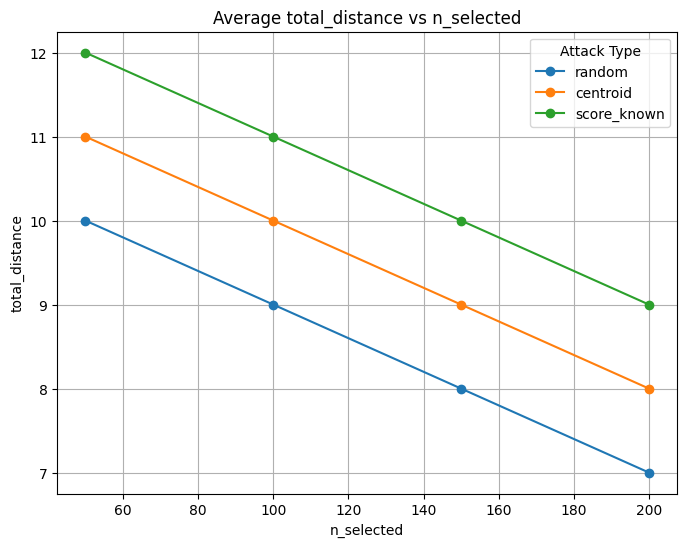

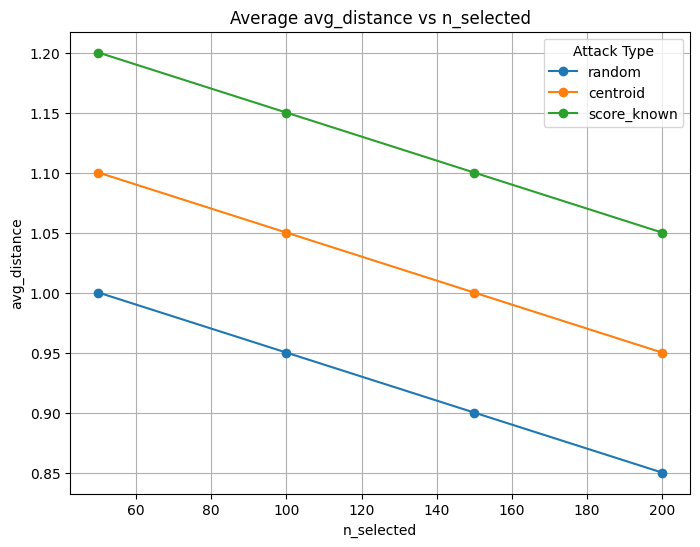

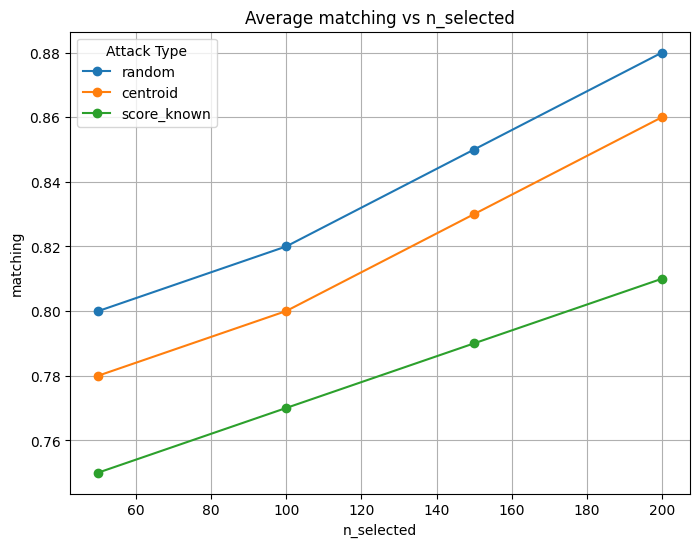

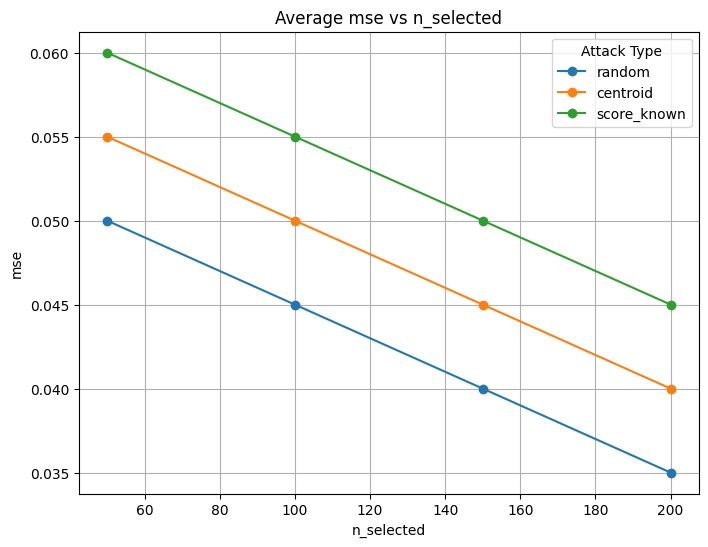

In [2]:
import matplotlib.pyplot as plt

def plot_metrics(avg_metrics_by_attack):
    """
    For each metric (total_distance, avg_distance, matching, mse), plot a separate graph
    showing the performance for each attack type over different n_selected values.
    
    :param avg_metrics_by_attack: Dictionary containing metrics for each attack type.
           Expected format:
           {
               "attack_type1": {
                   "n_selected": [...],
                   "total_distance": [...],
                   "avg_distance": [...],
                   "matching": [...],
                   "mse": [...]
               },
               "attack_type2": { ... },
               ...
           }
    """
    metrics = ["total_distance", "avg_distance", "matching", "mse"]

    for metric in metrics:
        plt.figure(figsize=(8, 6))
        
        # List to keep track of plotted line objects.
        lines = []
        
        for attack, values in avg_metrics_by_attack.items():
            n_selected = values.get("n_selected", [])
            metric_values = values.get(metric, [])
            
            # Only plot if both lists are non-empty.
            if n_selected and metric_values:
                # Plot with a label that is the attack type.
                line, = plt.plot(n_selected, metric_values, marker='o', label=str(attack))
                lines.append(line)
        
        plt.xlabel("n_selected")
        plt.ylabel(metric)
        plt.title(f"Average {metric} vs n_selected")
        
        # Only call legend() if there are plotted lines.
        if lines:
            plt.legend(title="Attack Type")
        else:
            print(f"No valid data to plot for metric: {metric}")
        
        plt.grid(True)
        plt.show()

# Example usage:
if __name__ == "__main__":
    # Dummy data for demonstration. Replace with your actual avg_metrics_by_attack.
    avg_metrics_by_attack = {
        "random": {
            "n_selected": [50, 100, 150, 200],
            "total_distance": [10, 9, 8, 7],
            "avg_distance": [1, 0.95, 0.9, 0.85],
            "matching": [0.8, 0.82, 0.85, 0.88],
            "mse": [0.05, 0.045, 0.04, 0.035]
        },
        "centroid": {
            "n_selected": [50, 100, 150, 200],
            "total_distance": [11, 10, 9, 8],
            "avg_distance": [1.1, 1.05, 1, 0.95],
            "matching": [0.78, 0.8, 0.83, 0.86],
            "mse": [0.055, 0.05, 0.045, 0.04]
        },
        "score_known": {
            "n_selected": [50, 100, 150, 200],
            "total_distance": [12, 11, 10, 9],
            "avg_distance": [1.2, 1.15, 1.1, 1.05],
            "matching": [0.75, 0.77, 0.79, 0.81],
            "mse": [0.06, 0.055, 0.05, 0.045]
        }
    }
    
    plot_metrics(avg_metrics_by_attack)


   total_distance  avg_distance  matching       mse  query_no  attack_type  \
0       23.117622     23.117622  [(0, 0)]  1.043798         0       random   
1        0.403230      0.403230  [(0, 0)]  0.000318         0     centroid   
2        0.510001      0.510001  [(0, 0)]  0.000508         0  score_known   
3       22.896824     22.896824  [(0, 0)]  1.023954         1       random   
4        0.516479      0.516479  [(0, 0)]  0.000521         1     centroid   

   n_selected  
0          10  
1          10  
2          10  
3          10  
4          10  
   attack_type  total_distance  avg_distance       mse  query_no  n_selected
0     centroid        0.438315      0.438315  0.000390       4.5        10.0
1       random       22.801909     22.801909  1.015888       4.5        10.0
2  score_known        0.572250      0.572250  0.000671       4.5        10.0


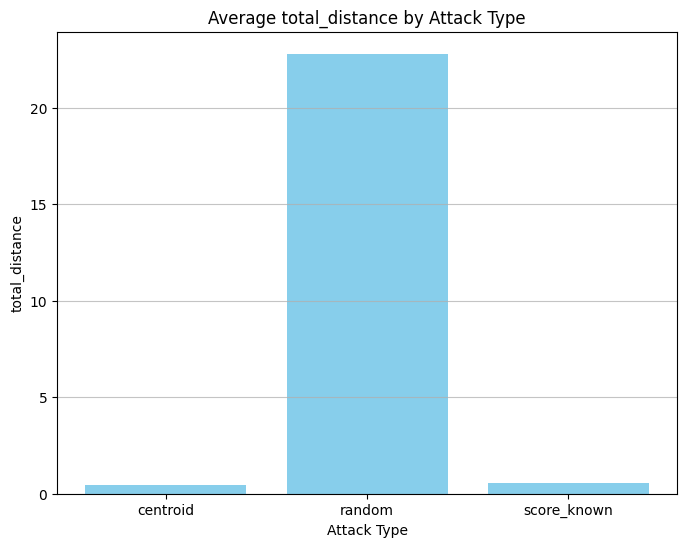

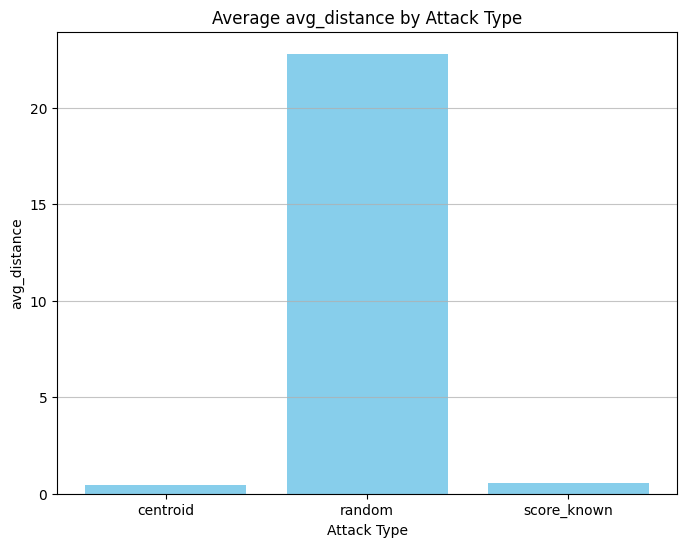

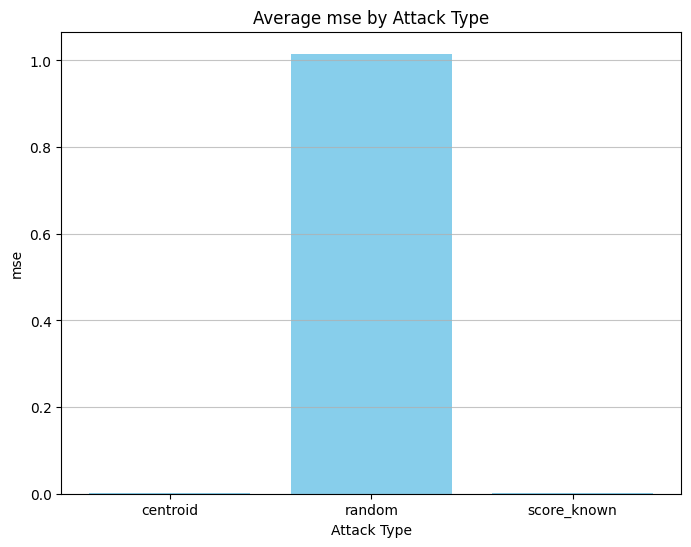

In [6]:
s

# # Option 2: Plot all metrics in subplots of a single figure
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# axes = axes.flatten()
# 
# for i, metric in enumerate(metrics):
#     axes[i].bar(grouped["attack_type"], grouped[metric], color="salmon")
#     axes[i].set_title(f"Average {metric}")
#     axes[i].set_xlabel("Attack Type")
#     axes[i].set_ylabel(metric)
#     axes[i].grid(axis="y", alpha=0.75)
# 
# plt.tight_layout()
# plt.show()


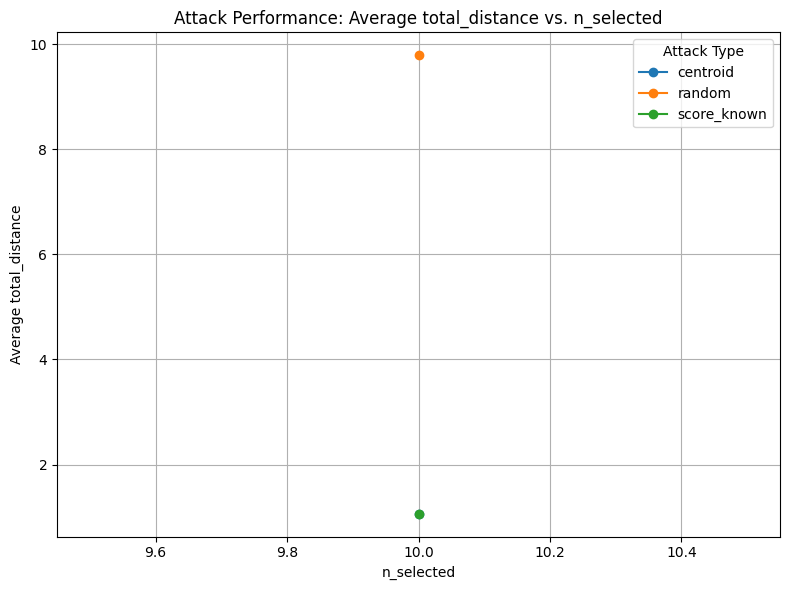

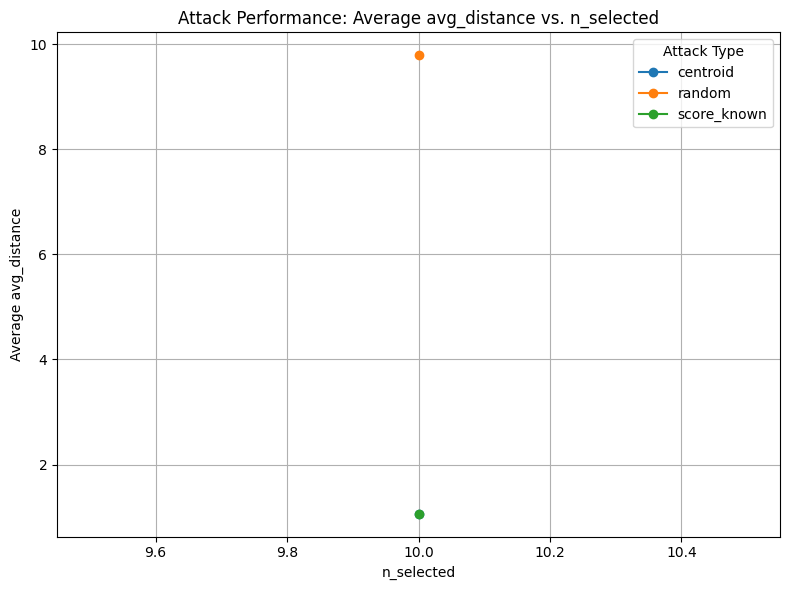

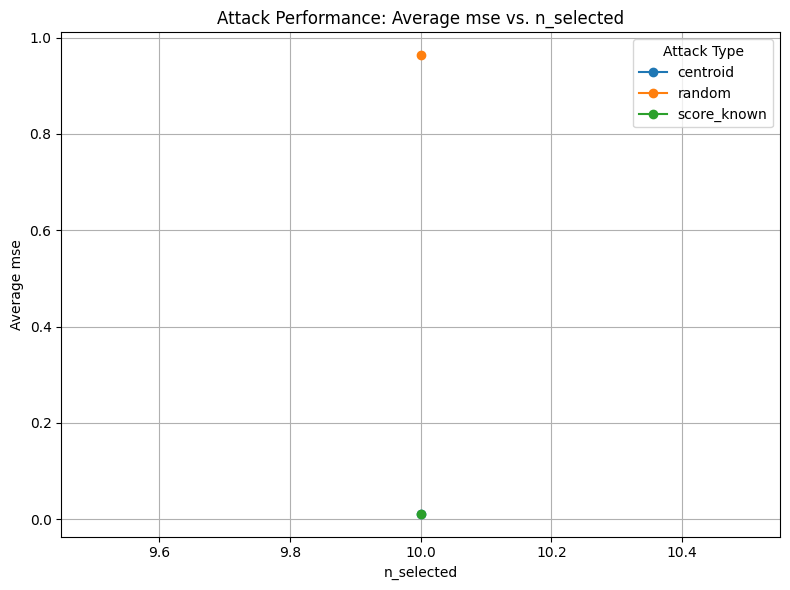

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_attack_performance_across_n_selected(csv_file):
    """
    Reads the CSV file and visualizes how different metrics vary with n_selected for each attack type.
    
    The CSV file is expected to contain columns:
      - 'total_distance', 'avg_distance', 'matching', 'mse'
      - 'query_no' (identifying individual runs)
      - 'attack_type'
      - 'n_selected'
      
    The function groups the data by 'attack_type' and 'n_selected' and computes the average
    for the metrics, then creates a separate plot for each metric.
    
    Parameters:
        csv_file (str): Path to the CSV file.
    """
    # Load the data
    df = pd.read_csv(csv_file)
    
    # Group by both attack_type and n_selected and compute the average metric values.
    grouped = df.groupby(['attack_type', 'n_selected']).mean().reset_index()
    
    # Define the list of metrics you want to visualize
    metrics = ['total_distance', 'avg_distance', 'mse']
    
    # Plot each metric in a separate figure.
    for metric in metrics:
        plt.figure(figsize=(8, 6))
        # Iterate over each unique attack type
        for attack in grouped['attack_type'].unique():
            sub_df = grouped[grouped['attack_type'] == attack].sort_values('n_selected')
            plt.plot(sub_df['n_selected'], sub_df[metric],
                     marker='o', label=attack)
        
        plt.xlabel('n_selected')
        plt.ylabel(f'Average {metric}')
        plt.title(f'Attack Performance: Average {metric} vs. n_selected')
        plt.legend(title='Attack Type')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Example usage:
if __name__ == "__main__":
    csv_file_path = "your_results_file.csv"  # Replace with the path to your CSV file.
    plot_attack_performance_across_n_selected("guassian_attack_results_20250206_085839.csv")


First few rows:
   total_distance  avg_distance  matching       mse  query_no  attack_type  \
0        8.937338      8.937338  [(0, 0)]  0.798760         0       random   
1        1.096284      1.096284  [(0, 0)]  0.012018         0     centroid   
2        1.107256      1.107256  [(0, 0)]  0.012260         0  score_known   
3        9.625032      9.625032  [(0, 0)]  0.926412         1       random   
4        1.094037      1.094037  [(0, 0)]  0.011969         1     centroid   

   n_selected  
0          10  
1          10  
2          10  
3          10  
4          10  

Grouped results:
   attack_type  total_distance  avg_distance       mse  query_no  n_selected
0     centroid        1.066488      1.066488  0.011428       4.5        10.0
1       random        9.790813      9.790813  0.963535       4.5        10.0
2  score_known        1.065287      1.065287  0.011392       4.5        10.0


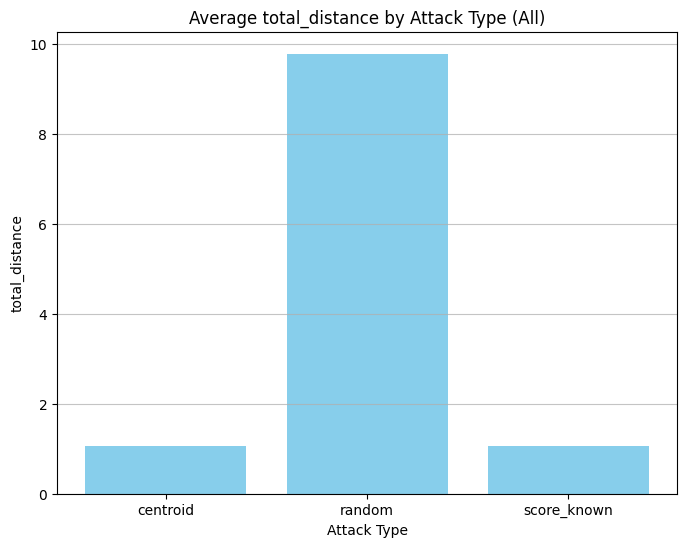

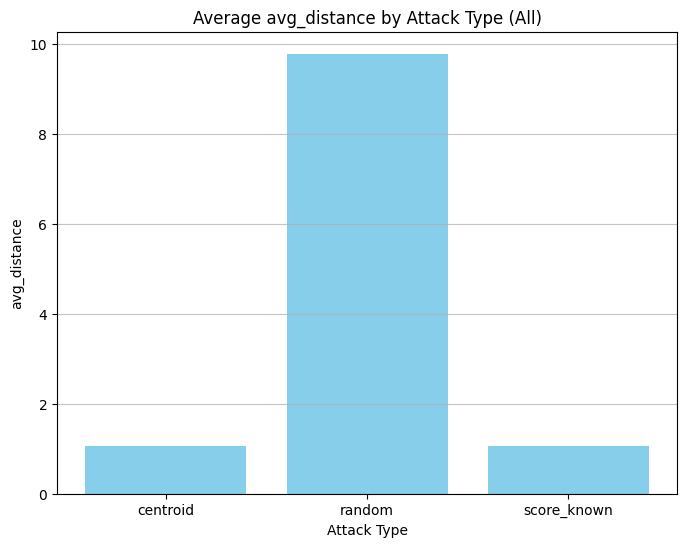

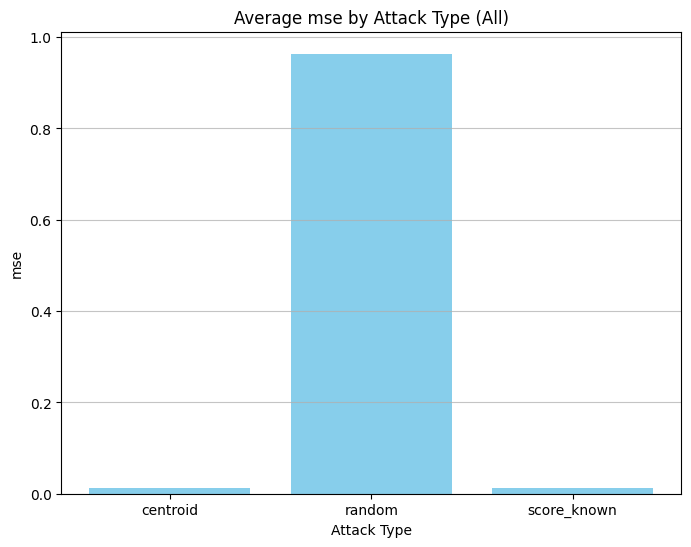

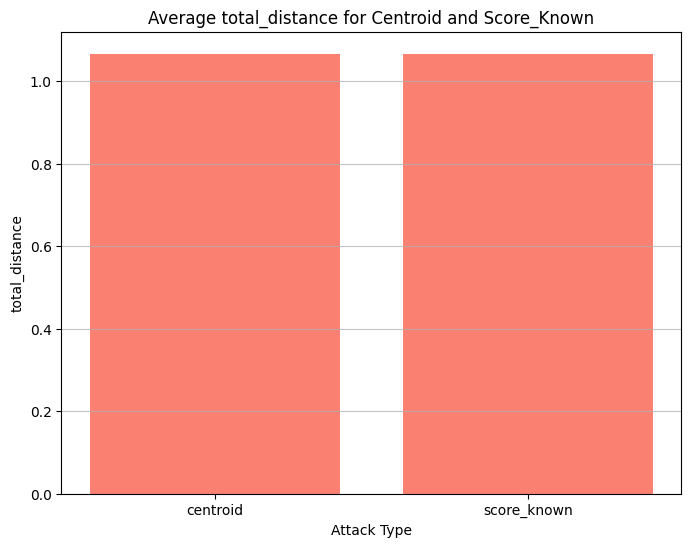

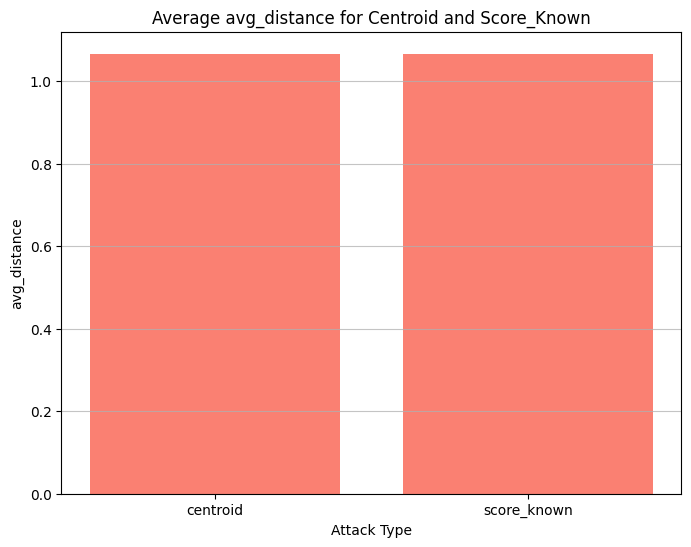

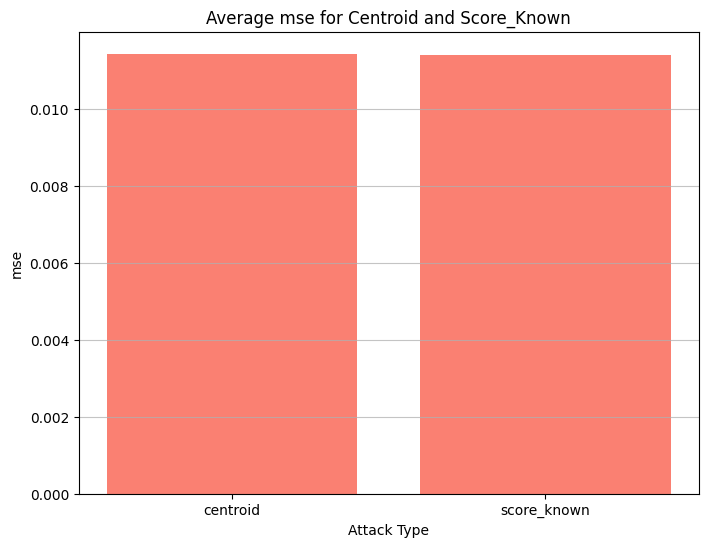

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your CSV file path
csv_file = "guassian_attack_results_20250206_085839.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows to verify the content
print("First few rows:")
print(df.head())

# Group by attack type and compute the average for the metrics.
grouped = df.groupby("attack_type").mean().reset_index()

# Print grouped results for inspection
print("\nGrouped results:")
print(grouped)

# List of metric columns to plot
metrics = ["total_distance", "avg_distance", "mse"]

# Option 1: Plot each metric in a separate figure (bar chart) for all attack types
for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar(grouped["attack_type"], grouped[metric], color="skyblue")
    plt.xlabel("Attack Type")
    plt.ylabel(metric)
    plt.title(f"Average {metric} by Attack Type (All)")
    plt.grid(axis="y", alpha=0.75)
    plt.show()

# Option 2: Plot a separate chart for centroid and score_known for clarity
subset = grouped[grouped["attack_type"].isin(["centroid", "score_known"])]

if not subset.empty:
    for metric in metrics:
        plt.figure(figsize=(8, 6))
        plt.bar(subset["attack_type"], subset[metric], color="salmon")
        plt.xlabel("Attack Type")
        plt.ylabel(metric)
        plt.title(f"Average {metric} for Centroid and Score_Known")
        plt.grid(axis="y", alpha=0.75)
        plt.show()
else:
    print("No data found for attack types 'centroid' and 'score_known'.")


In [1]:
from attack.attack_gradient_market.poison_attack.attack_martfl import BackdoorImageGenerator

backdoor_generator = BackdoorImageGenerator(trigger_type="blended_patch", target_label=0,
                                            channels=1)


In [ ]:
backdoor_generator.generate_poisoned_dataset()

In [3]:
from marketplace.utils.gradient_market_utils.data_processor import get_data_set

client_loaders, full_dataset, test_set_loader = get_data_set("FMINIST", buyer_count=5000, num_sellers=1,
                                                             iid=True)

Client splits:
  Client buyer: 5000 samples
  Client seller_0: 55000 samples


In [4]:
full_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
backdoor_generator.generate_poisoned_dataset()


In [6]:
import torch
import random
from torch.utils.data import TensorDataset, DataLoader, Subset


def generate_attack_test_set(full_dataset, backdoor_generator, n_samples=1000):
    sample_indices = random.sample(range(len(full_dataset)), n_samples)
    subset_dataset = Subset(full_dataset, sample_indices)

    # ---------------------------
    # 2. Extract Images and Labels
    # ---------------------------
    # FashionMNIST images come in shape (1, H, W). For our backdoor generator,
    # assume we want images as (H, W, C). We can squeeze and then unsqueeze at the end.

    X_list, y_list = [], []
    for img, label in subset_dataset:
        # img is a torch.Tensor of shape (1, H, W); convert to (H, W, 1)
        img = img.permute(1, 2, 0)  # now shape (H, W, C)
        X_list.append(img)
        y_list.append(label)

    X = torch.stack(X_list)  # Shape: (10000, H, W, C)
    y = torch.tensor(y_list)  # Shape: (10000,)

    # ---------------------------
    # 3. Generate Poisoned Dataset
    # ---------------------------
    # Assuming your backdoor generator has a method generate_poisoned_dataset that takes
    # torch.Tensors in shape (N, H, W, C) and returns (X_poisoned, y_poisoned)
    # with the same shape for X_poisoned.

    # For example, if your backdoor generator is an instance of AdvancedBackdoorAttack:
    # backdoor_generator = AdvancedBackdoorAttack(trigger_pattern=..., target_label=..., alpha=0.1, ...)

    X_poisoned, y_poisoned = backdoor_generator.generate_poisoned_dataset(X, y, poison_rate=0.1)

    # ---------------------------
    # 4. Build DataLoaders
    # ---------------------------
    # Many PyTorch models expect image tensors to be in shape (N, C, H, W), so we permute.
    X = X.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)
    X_poisoned = X_poisoned.permute(0, 3, 1, 2)

    clean_dataset = TensorDataset(X, y)
    triggered_dataset = TensorDataset(X_poisoned, y_poisoned)

    batch_size = 64
    clean_loader = DataLoader(clean_dataset, batch_size=batch_size, shuffle=True)
    triggered_loader = DataLoader(triggered_dataset, batch_size=batch_size, shuffle=True)
    return clean_loader, triggered_loader

clean_loader, triggered_loader = generate_attack_test_set(full_dataset, backdoor_generator, n_samples=20)


In [7]:
clean_loader

In [8]:
triggered_loader

In [10]:
clean_loader.dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1176, 0.5255, 0.6000, 0.5686, 0.4627, 0.4588,
          0.4627, 0.5176, 0.4902, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
          0.0000, 0.4980, 0.9451, 0.9451, 0.9451, 0.9529, 0.9608, 0.9608,
          0.9412, 0.9412, 0.9686, 0.6980, 0.0000, 0.0078, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.6078, 0.9294, 0.8157, 0.8980, 0.9333, 0.9373, 0.9294,
          0.8941, 0.8353, 0.9255, 0.3725, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.3137, 0.7569, 0.9020, 0.8784, 0.8745, 0.8824, 0.9569, 0.8980,
          0.8863, 0.8824, 0.9098, 0.8392, 0.3412, 0.0000,

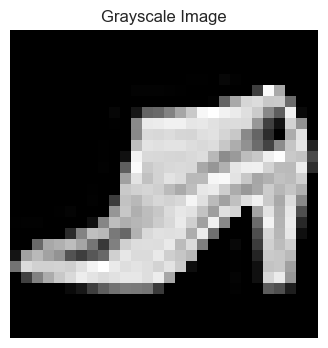

In [26]:
import torch
import matplotlib.pyplot as plt

def visualize_image_tensor(img_tensor, title="Image"):
    """
    Visualize an image tensor using matplotlib.
    
    Parameters:
      img_tensor (torch.Tensor): An image tensor, assumed to be either in (C, H, W) or (H, W, C) format.
      title (str): Title for the plot.
      
    The pixel values are assumed to be in [0, 1] or [0, 255]. 
    For [0, 255], the image will be converted to float and normalized.
    """
    # Move to CPU and detach
    img = img_tensor.detach().cpu()
    
    # If the tensor is in (C, H, W) format, permute to (H, W, C)
    if img.ndim == 3 and img.shape[0] in [1, 3]:
        img = img.permute(1, 2, 0)
    
    # Convert to numpy array
    np_img = img.numpy()
    
    # If pixel values are large (e.g., 0-255), normalize to [0,1] for plotting.
    if np_img.max() > 1:
        np_img = np_img / 255.0

    plt.figure(figsize=(4, 4))
    plt.imshow(np_img, cmap='gray' if np_img.shape[-1] == 1 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Example usage:
# Create a dummy tensor for a grayscale image (1, H, W) where H=W=28.
dummy_img = torch.rand(1, 28, 28)  # values in [0, 1]
visualize_image_tensor(clean_loader.dataset[9][0], title="Grayscale Image")



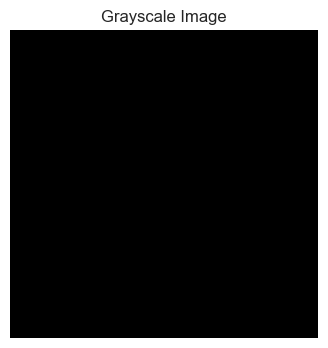

In [37]:
t = 6
visualize_image_tensor(clean_loader.dataset[t][0] - triggered_loader.dataset[t][0], title="Grayscale Image")
